In [1]:
import tushare as ts
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://mp.weixin.qq.com/s/rkBthrSTjMqqqIyCuhe3cg
data = ts.get_hist_data("600036")

In [3]:
data.shape

(611, 13)

In [4]:
data.to_csv('chinastock600036.csv')

In [5]:
data=data.reset_index()

In [6]:
data.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019-04-30,34.57,34.90,34.45,33.85,953712.00,-0.88,-2.49,35.074,35.273,35.224,599054.96,543607.57,611643.54
1,2019-04-29,34.57,35.73,35.33,34.42,550331.75,0.97,2.82,35.230,35.428,35.206,507450.98,532317.89,616277.75
2,2019-04-26,35.16,35.20,34.36,34.34,517344.44,-1.07,-3.02,35.124,35.377,35.135,540550.57,569776.81,646968.77
3,2019-04-25,35.35,35.86,35.43,35.28,433788.28,-0.37,-1.03,35.452,35.421,35.043,519431.40,554378.17,640472.68
4,2019-04-24,35.53,35.90,35.80,34.82,540098.31,0.57,1.62,35.466,35.374,34.892,497221.89,568250.94,648490.99


In [7]:
data['date']=pd.to_datetime(data['date'])
data.sort_values(by='date',inplace=True)

In [8]:
data['date'][0].toordinal()

737179

In [9]:
data['uni_day']=data['date'].apply(lambda x: x.toordinal())
data['month']=data['date'].dt.month
data['week_in_year']=data['date'].dt.weekofyear
data['day_in_week']=data['date'].dt.dayofweek
data=data.reset_index()

In [10]:
data.tail(30)

,index,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,uni_day,month,week_in_year,day_in_week
581,29,2019-03-19,32.40,32.62,32.03,31.93,486750.50,-0.33,-1.02,31.710,31.404,31.515,605475.59,656591.47,671380.04,737137,3,12,1
582,28,2019-03-20,31.88,32.47,32.27,31.70,465379.12,0.24,0.75,31.956,31.409,31.621,565229.13,648455.75,677931.98,737138,3,12,2
583,27,2019-03-21,32.13,32.40,31.98,31.92,386223.72,-0.29,-0.90,32.062,31.477,31.716,505485.39,616305.40,674586.18,737139,3,12,3
584,26,2019-03-22,32.08,32.38,32.35,31.71,430268.47,0.37,1.16,32.198,31.634,31.802,472350.55,582325.65,675355.85,737140,3,12,4
585,25,2019-03-25,32.00,32.10,31.17,31.10,639210.56,-1.18,-3.65,31.960,31.698,31.735,481566.47,578715.71,652224.04,737143,3,13,0
586,24,2019-03-26,31.59,31.65,31.49,31.21,403361.91,0.32,1.03,31.852,31.781,31.735,464888.76,535182.17,624963.99,737144,3,13,1
587,23,2019-03-27,31.69,32.54,32.40,31.45,594154.50,0.91,2.89,31.878,31.917,31.769,490643.83,527936.48,614254.60,737145,3,13,2
588,22,2019-03-28,32.17,32.65,32.52,31.95,387422.56,0.12,0.37,31.986,32.024,31.808,490883.60,498184.50,609243.55,737146,3,13,3
589,21,2019-03-29,32.52,34.32,33.92,32.41,1164152.25,1.40,4.30,32.300,32.249,31.859,637660.36,555005.45,633317.63,737147,3,13,4
590,20,2019-04-01,34.20,35.05,34.08,33.90,1046396.19,0.16,0.47,32.882,32.421,31.929,719097.48,600331.98,637814.38,737150,4,14,0


In [11]:
data.describe()

,index,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,uni_day,month,week_in_year,day_in_week
count,611.000000,611.000000,611.000000,611.000000,611.000000,6.110000e+02,611.000000,611.000000,611.000000,611.000000,611.000000,6.110000e+02,6.110000e+02,611.000000,611.000000,611.000000,611.000000,611.000000
mean,305.000000,26.192619,26.565074,26.232733,25.886645,4.957600e+05,0.031391,0.138773,26.177426,26.106406,25.964191,4.940258e+05,4.927474e+05,490017.152635,736721.563011,6.410802,26.207856,2.022913
std,176.524786,4.787790,4.907579,4.798006,4.685763,2.414484e+05,0.484036,1.738382,4.775928,4.748737,4.694801,1.861892e+05,1.684723e+05,154782.664141,263.937630,3.657440,15.916308,1.405889
min,0.000000,17.530000,17.610000,17.490000,17.390000,1.009080e+05,-2.240000,-6.470000,17.634000,17.705000,17.869000,1.289332e+05,1.289332e+05,128933.230000,736268.000000,1.000000,1.000000,0.000000
25%,152.500000,22.530000,22.995000,22.685000,22.205000,3.232566e+05,-0.220000,-0.810000,22.354000,22.087500,21.915500,3.628652e+05,3.758151e+05,386336.920000,736495.500000,3.000000,12.000000,1.000000
50%,305.000000,27.450000,27.960000,27.450000,27.030000,4.426894e+05,0.010000,0.050000,27.424000,27.363000,27.337000,4.597577e+05,4.632848e+05,461204.930000,736718.000000,6.000000,25.000000,2.000000
75%,457.500000,29.375000,29.795000,29.395000,28.920000,6.242532e+05,0.280000,1.085000,29.259000,29.286000,29.152500,6.061259e+05,6.014396e+05,604259.365000,736945.500000,10.000000,42.000000,3.000000
max,610.000000,35.900000,36.480000,36.000000,35.650000,1.551975e+06,1.890000,6.950000,35.630000,35.428000,35.224000,1.238826e+06,1.024262e+06,890276.620000,737179.000000,12.000000,52.000000,4.000000


In [12]:
data.columns

Index(['index', 'date', 'open', 'high', 'close', 'low', 'volume',
       'price_change', 'p_change', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10',
       'v_ma20', 'uni_day', 'month', 'week_in_year', 'day_in_week'],
      dtype='object')

In [13]:
X=data[['uni_day','close','volume','price_change','month','week_in_year','day_in_week']]
Y=data['close']

In [14]:
X_lately=np.array(X[600:])
X=np.array(X[:599])
Y=np.array(Y[10:609])
print(X.shape,Y.shape,X_lately.shape)

(599, 7) (599,) (11, 7)


In [15]:
X_train=X[0:589,:]
X_test=X[589:,:]
Y_train=Y[0:589]
Y_test=Y[589:]
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(589, 7) (589,) (10, 7) (10,)


In [16]:
linreg = LinearRegression()  
linreg.fit(X_train, Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
forecast_set = linreg.predict(X_test)
print(list(zip(Y_test,forecast_set)))

[(34.82, 34.320179952828084), (36.0, 34.440057755040925), (35.83, 34.652347939823585), (35.5, 34.93354554227949), (36.0, 35.624339442199016), (34.8, 35.95095766396821), (35.23, 35.30972296610116), (35.8, 35.196719089107546), (35.43, 35.06354725762253), (34.36, 34.85573125158089)]


In [18]:
data[599:609]['date']

599   2019-04-15
600   2019-04-16
601   2019-04-17
602   2019-04-18
603   2019-04-19
604   2019-04-22
605   2019-04-23
606   2019-04-24
607   2019-04-25
608   2019-04-26
Name: date, dtype: datetime64[ns]

In [19]:
df3=pd.concat([pd.DataFrame(Y_test),pd.DataFrame(forecast_set)],axis=1,join="outer",ignore_index=True)
df4=pd.DataFrame(data[599:609]['date']).reset_index().drop(columns=['index'])
df3=pd.concat([df3,df4],axis=1,join="outer",ignore_index=True)
df3.rename({0:'Y_test',1:'forecast',2:'date'},axis=1,inplace=True)

In [20]:
df3

,Y_test,forecast,date
0,34.82,34.320180,2019-04-15
1,36.00,34.440058,2019-04-16
2,35.83,34.652348,2019-04-17
3,35.50,34.933546,2019-04-18
4,36.00,35.624339,2019-04-19
5,34.80,35.950958,2019-04-22
6,35.23,35.309723,2019-04-23
7,35.80,35.196719,2019-04-24
8,35.43,35.063547,2019-04-25
9,34.36,34.855731,2019-04-26


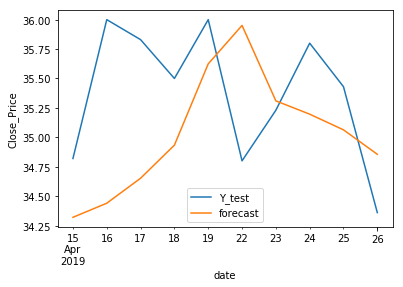

In [21]:
df3.plot(x='date',y=['Y_test','forecast']) 
plt.xlabel('date')  
plt.ylabel('Close_Price')  
plt.show()  

In [22]:
Y_lately_forecast=linreg.predict(X_lately)

In [23]:
print('Date {} \nforecast_close_price is: {}\nactual_close_price is: {}'.format(str(data.loc[610,'date']),Y_lately_forecast[0],str(data.loc[610,'close'])))

Date 2019-04-30 00:00:00 
forecast_close_price is: 35.98561262730027
actual_close_price is: 34.45
